# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [111]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [113]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [53]:
#1.Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill.
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [55]:
y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

In [57]:
#2_Remova as variáveis não significantes.

y, X = patsy.dmatrices('tip ~ time + net_bill + 0', tips[:5])
X

DesignMatrix with shape (5, 3)
  time[Lunch]  time[Dinner]  net_bill
            0             1     15.98
            0             1      8.68
            0             1     17.51
            0             1     20.37
            0             1     20.98
  Terms:
    'time' (columns 0:2)
    'net_bill' (column 2)

In [59]:
y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

In [61]:
#3_observe o gráfico de resíduos em função de net_bill

reg = smf.ols('np.log(tip) ~ C(time) + np.log(net_bill)', data = tips).fit()
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.60
Date:                Sun, 25 May 2025   Prob (F-statistic):           7.06e-21
Time:                        16:09:03   Log-Likelihood:                -96.286
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3997      0.134     -2.979      0.003      -0.664      -0.135
C(time)[T.Dinner]     0.0196      0.052      0.375      0.708      -0.084       0.123
np.log(net_bill)      0.5119      0.049     10.406      0.000       0.415       0.609
==============================================================================
Omnibus:                       12.136   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               26.710
Skew:                           0.122   Prob(JB):                     1.59e-06
Kurtosis:                       4.602   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

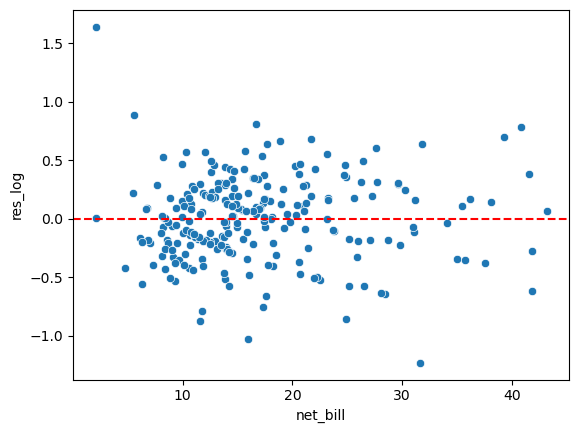

In [63]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [65]:
#4_teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.
# Modelo logaritmo


In [67]:
# Modelo base
y_base, X_base = patsy.dmatrices('tip ~ net_bill', data=tips)
modelo_base = sm.OLS(y_base, X_base).fit()

# Modelo logaritmo
tips['log_net_bill'] = np.log(tips['net_bill'])
y_log, X_log = patsy.dmatrices('tip ~ log_net_bill', data=tips)
modelo_log = sm.OLS(y_log, X_log).fit()

# Modelo polinomial (ordem 2)
y_poly, X_poly = patsy.dmatrices('tip ~ net_bill + I(net_bill**2)', data=tips)
modelo_poly = sm.OLS(y_poly, X_poly).fit()

#Comparando os modelos
print('Modelo Base')
print(modelo_base.summary())

print('\n Modelo Log')
print(modelo_log.summary())

print('\n Modelo Polinomial')
print(modelo_poly.summary())

Modelo Base
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 25 May 2025   Prob (F-statistic):           5.02e-23
Time:                        16:09:07   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [115]:
#1_Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.

# Fórmula do modelo
formula = 'np.log(tip) ~ sex + smoker + time + net_bill'

# Gerar as matrizes
y, X = patsy.dmatrices(formula, data=tips)

# Visualizar as primeiras linhas
print('Matriz Y (log do tip):\n', y[:5])
print('\nMatriz de Design X:\n', X[:5])

# Verificar os nomes das colunas da matriz de design
print('\nColunas da matriz X:')
print(X.design_info.column_names)


Matriz Y (log do tip):
 [[0.00995033]
 [0.5068176 ]
 [1.25276297]
 [1.19694819]
 [1.28370777]]

Matriz de Design X:
 [[ 1.    1.    1.    1.   15.98]
 [ 1.    0.    1.    1.    8.68]
 [ 1.    0.    1.    1.   17.51]
 [ 1.    0.    1.    1.   20.37]
 [ 1.    1.    1.    1.   20.98]]

Colunas da matriz X:
['Intercept', 'sex[T.Female]', 'smoker[T.No]', 'time[T.Dinner]', 'net_bill']


In [ ]:

# Criar a variável net_bill (valor da conta sem a gorjeta)
formula2['net_bill'] = tips['total_bill'] - tips['tip']

# Visualizar as 5 primeiras linhas para conferir
print(tips[['total_bill', 'tip', 'net_bill']].head())


In [121]:
#2_Remova as variáveis não significantes.

tips2 = 'np.log(tip) ~ smoker + net_bill'

y2, X2 = patsy.dmatrices(formula2, data=tips)

# Ajustar o novo modelo
modelo2 = sm.OLS(y2, X2).fit()

# Ver o resumo
print(modelo2.summary())


                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Sun, 25 May 2025   Prob (F-statistic):           2.31e-20
Time:                        16:29:18   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254   

In [123]:
#3_Observe o gráfico de resíduos em função de net_bill

# Criar a variável net_bill
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Definir a fórmula
formula = 'np.log(tip) ~ net_bill + smoker + sex + time'

# Gerar as matrizes
y, X = patsy.dmatrices(formula, data=tips)

# Ajustar o modelo
modelo = sm.OLS(y, X).fit()

# Ver o resumo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.21e-18
Time:                        16:35:45   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

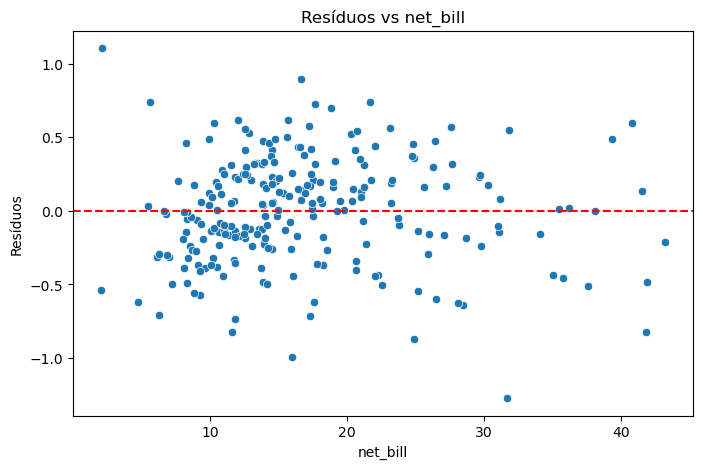

In [127]:
# Obter os resíduos
residuos = modelo.resid

# Adicionar os resíduos no dataframe
tips['residuos'] = residuos

# Plotando o gráfico de resíduos
plt.figure(figsize=(8,5))
sns.scatterplot(x='net_bill', y='residuos', data=tips)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs net_bill')
plt.show()

In [129]:
#4_Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

# Criar net_bill
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Adicionar log de net_bill para modelo 2
tips = tips[tips['net_bill'] > 0]  # Evitar log de zero
tips['log_net_bill'] = np.log(tips['net_bill'])

# Fórmulas dos modelos
formula1 = 'np.log(tip) ~ net_bill + smoker + sex + time'
formula2 = 'np.log(tip) ~ log_net_bill + smoker + sex + time'
formula3 = 'np.log(tip) ~ net_bill + I(net_bill ** 2) + smoker + sex + time'

# Matrizes para cada modelo
y1, X1 = patsy.dmatrices(formula1, data=tips)
y2, X2 = patsy.dmatrices(formula2, data=tips)
y3, X3 = patsy.dmatrices(formula3, data=tips)

# Ajustar os modelos
modelo1 = sm.OLS(y1, X1).fit()
modelo2 = sm.OLS(y2, X2).fit()
modelo3 = sm.OLS(y3, X3).fit()

# Resumo dos modelos
print("Modelo 1 - Linear simples")
print(modelo1.summary())

print("\nModelo 2 - Log de net_bill")
print(modelo2.summary())

print("\nModelo 3 - Polinômio de grau 2")
print(modelo3.summary())


Modelo 1 - Linear simples
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.21e-18
Time:                        16:40:23   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         

O melhor modelo seria o 03. Possui R² ajustado mais alto, AIC/BIC menores. 
Mostrando que as gorjetas aumentam mais lentamente conforme a conta cresce 

In [139]:
#5_Do modelo final deste item, calcule o R² na escala de tip (sem o log). Compare com o modelo do item 1. 
#Qual tem melhor coeficiente de determinação?

# Modelo do item 1 (na escala original)
formula_item1 = 'tip ~ net_bill + smoker + sex + time'
y1, X1 = patsy.dmatrices(formula_item1, data=tips)
modelo_item1 = sm.OLS(y1, X1).fit()

R2_item1 = round(modelo_item1.rsquared, 4)
print(f'R² do modelo do item 1 (escala original): {R2_item1}')

# Modelo com log e polinômio de grau 2 (exemplo de fórmula)
formula3 = 'np.log(tip) ~ net_bill + I(net_bill**2) + smoker + sex + time'
y3, X3 = patsy.dmatrices(formula3, data=tips)
modelo3 = sm.OLS(y3, X3).fit()

# Previsões na escala do log
log_preds = modelo3.predict(X3)

# Converter para a escala original de tip
preds_tip = np.exp(log_preds)

# Valores reais de tip
tip_real = tips['tip']

# Calcular SSE e SST
SSE = np.sum((tip_real - preds_tip) ** 2)
SST = np.sum((tip_real - np.mean(tip_real)) ** 2)

# Calcular R² na escala original
R2_original_log = round(1 - (SSE / SST), 4)

print(f'R² do modelo com log e polinômio (na escala de tip): {R2_original_log}')


R² do modelo do item 1 (escala original): 0.3352
R² do modelo com log e polinômio (na escala de tip): 0.3142


O modelo 01 possui R² maior isso significa que, na escala original da variável tip, o modelo do item 1 explica melhor a variabilidade dos dados.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [15]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
#carregando dataframe

renda = pd.read_csv('previsao_de_renda.csv')
renda.head()
print(renda) 

       Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  \
0               0  2015-01-01       15056    F             False   
1               1  2015-01-01        9968    M              True   
2               2  2015-01-01        4312    F              True   
3               3  2015-01-01       10639    F             False   
4               4  2015-01-01        7064    M              True   
...           ...         ...         ...  ...               ...   
14995       14995  2016-03-01       16006    F             False   
14996       14996  2016-03-01        3722    F             False   
14997       14997  2016-03-01        6194    F              True   
14998       14998  2016-03-01        4922    M              True   
14999       14999  2016-03-01       14651    F             False   

       posse_de_imovel  qtd_filhos        tipo_renda           educacao  \
0                 True           0        Empresário         Secundário   
1                 True           

In [23]:
#1_Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. 
#Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

renda[['renda', 'tempo_emprego']].describe()
renda[['renda', 'tempo_emprego']].info()

#verificando se há valores nulos
renda[['renda', 'tempo_emprego']].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   renda          15000 non-null  float64
 1   tempo_emprego  12427 non-null  float64
dtypes: float64(2)
memory usage: 234.5 KB


renda               0
tempo_emprego    2573
dtype: int64

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        20:47:19   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409

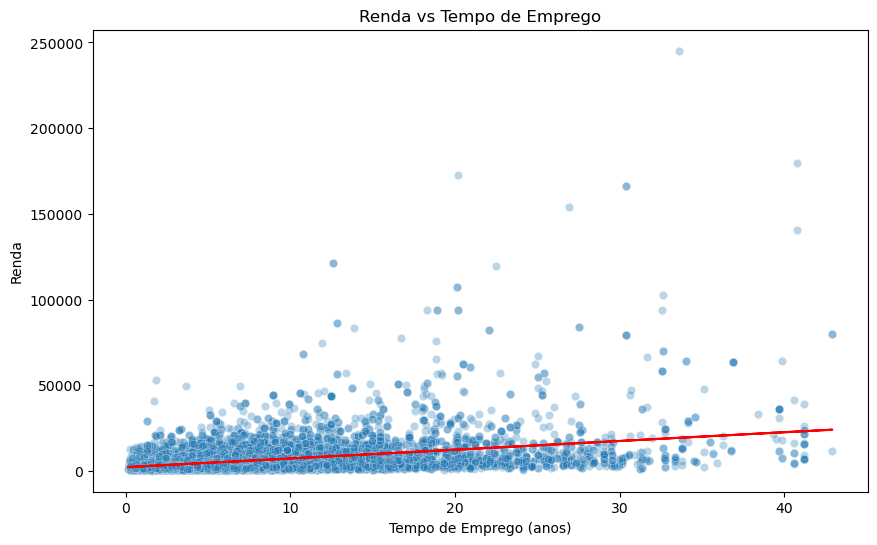

In [31]:
#removendo valores nulos
renda_limpo = renda[['renda', 'tempo_emprego']].dropna()

#ajustando modelo
# Definindo as variáveis
X = renda_limpo['tempo_emprego']
y = renda_limpo['renda']

# Adicionando constante (intercepto)
X = sm.add_constant(X)

# Ajustando o modelo
modelo = sm.OLS(y, X).fit()

# Resultados do modelo
print(modelo.summary())

#visualizando ajuste do modelo

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='renda', data=renda_limpo, alpha=0.3)
plt.plot(renda_limpo['tempo_emprego'], modelo.predict(X), color='red')
plt.title('Renda vs Tempo de Emprego')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda')
plt.show()




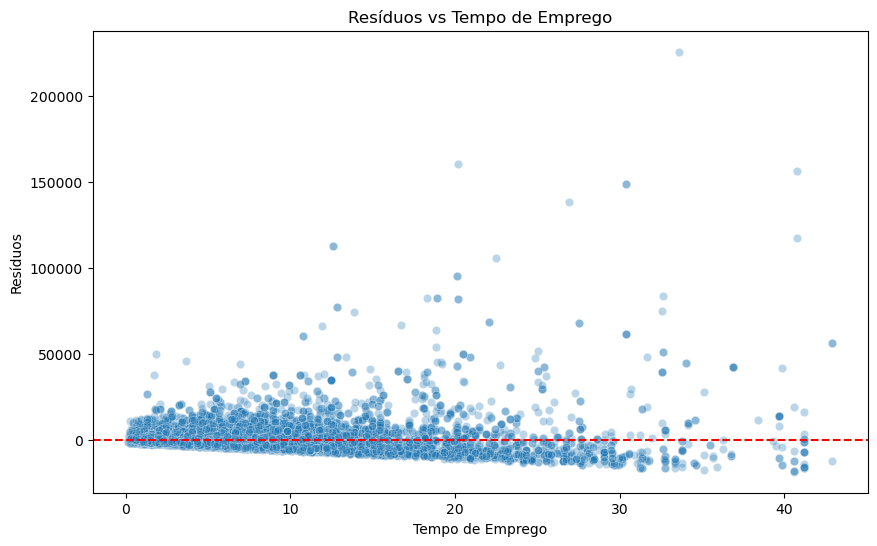

In [35]:
#2_Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

#calculando resíduos
# Predições
y_pred = modelo.predict(X)

# Resíduos
residuos = y - y_pred

#plotando residuos vs preditores

plt.figure(figsize=(10,6))
sns.scatterplot(x=renda_limpo['tempo_emprego'], y=residuos, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Tempo de Emprego')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.show()


In [41]:
#melhoria usando outras variáveis

import statsmodels.formula.api as smf

modelo_melhorado = smf.ols('renda ~ idade + tempo_emprego + C(educacao) + C(tipo_renda) + C(posse_de_imovel)', data=renda).fit()
print(modelo_melhorado.summary())



                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     198.9
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        21:14:54   Log-Likelihood:            -1.2962e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12415   BIC:                         2.594e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [45]:
#transformação da variável renda
renda['log_renda'] = np.log1p(renda['renda'])  # log(1 + renda) evita problemas com zero

#montando modelo de regressão linear múltpla

formula = 'log_renda ~ idade + tempo_emprego + qtd_filhos + C(sexo) + C(estado_civil) + C(posse_de_veiculo) + C(posse_de_imovel) + C(educacao) + C(tipo_renda)'

#ajustando modelo
modelo = smf.ols(formula, data=renda).fit()
print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     382.6
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        21:20:17   Log-Likelihood:                -13569.
No. Observations:               12427   AIC:                         2.718e+04
Df Residuals:                   12408   BIC:                         2.732e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

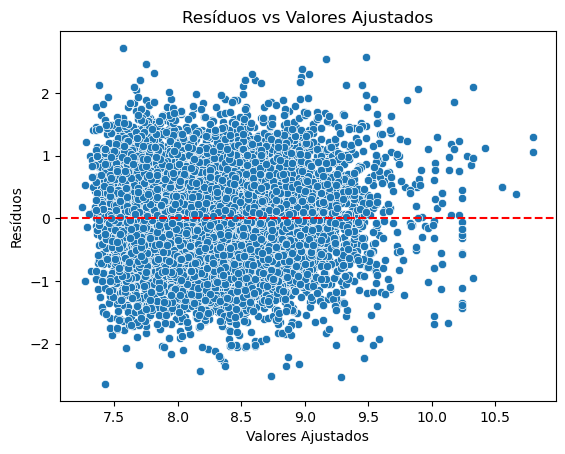

In [47]:
sns.scatterplot(x=modelo.fittedvalues, y=modelo.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()


In [53]:
#4_Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

# Modelo ajustado (removendo variáveis com p-valor alto)
formula_ajustada = 'log_renda ~ idade + tempo_emprego + C(estado_civil) + C(posse_de_veiculo) + C(posse_de_imovel) + C(educacao) + C(tipo_renda)'

modelo_ajustado = smf.ols(formula_ajustada, data=renda).fit()
print(modelo_ajustado.summary())



                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     200.2
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        21:30:34   Log-Likelihood:                -14885.
No. Observations:               12427   AIC:                         2.980e+04
Df Residuals:                   12410   BIC:                         2.993e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [55]:
# Modelo ajustado (removendo variáveis com p-valor alto)
formula_ajustada = 'log_renda ~ idade + tempo_emprego + C(estado_civil) + C(posse_de_veiculo) + C(posse_de_imovel) + C(educacao) + C(tipo_renda)'

modelo_ajustado = smf.ols(formula_ajustada, data=renda).fit()
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     200.2
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        21:30:54   Log-Likelihood:                -14885.
No. Observations:               12427   AIC:                         2.980e+04
Df Residuals:                   12410   BIC:                         2.993e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

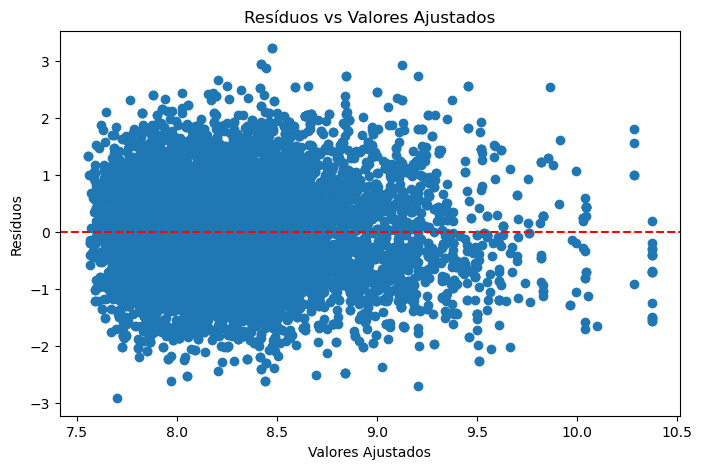

In [61]:
#5_Faça uma análise de resíduos. Avalie a qualidade do ajuste
residuos = modelo_ajustado.resid
valores_ajustados = modelo_ajustado.fittedvalues

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Resíduos vs valores ajustados (verificar homocedasticidade)
plt.figure(figsize=(8,5))
plt.scatter(valores_ajustados, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()

